# Infant Mortality in India

Context: I thought about this after reading [Doing good better](https://www.amazon.com/Doing-Good-Better-Effective-Altruism/dp/1592409660) (highly recommend). Soon after I found out about kepler.gl which made this the perfect project to test it out.

Some (back of the envelope) calculations to show that we loose 8.3 lakh babies every year.

In [1]:
# India rates; all data from 2011 or so. no consistent data after that :(
infant_mortality_rate = 34
crude_birth_rate = 20.4
population = 1210854977

In [2]:
def lives_lost(infant_mortality_rate, crude_birth_rate, population):
    # One must note this number does not include anybody dying over the age of 1.
    number_of_births = crude_birth_rate * population / 1000
    number_of_dead = infant_mortality_rate * number_of_births /1000
    return number_of_dead  

In [3]:
l = lives_lost(infant_mortality_rate, crude_birth_rate, population)
l

839849.0120472

In [4]:
lives_lost_per_min = l /(365 * 24 * 60)
lives_lost_per_min

1.5978862481872147

In [5]:
lives_created_per_min = population * crude_birth_rate /(1000 *365 *24*60)
lives_created_per_min

46.996654358447486

# QALY calculation

QALY stands for Quality adjusted life years. It is a way of measuring how efficient an intervention is. read more about it [here](https://en.wikipedia.org/wiki/Quality-adjusted_life_year).

In [6]:
life_expectancy = 68.35
qaly_per_life = 60 #something a little less than life expectancy, hacky

In [7]:
qaly_lost = l * qaly_per_life
qaly_lost

50390940.722832

# Infant mortality, Population, Birth rate by State

After lots of painful data processing [here](./Data_cleaning.html).

In [8]:
import pandas as pd

In [9]:
birth_rate = pd.read_csv("birth_rate.csv",index_col="states")
infant_mortality = pd.read_csv("infant_mortality.csv", index_col="states")
population = pd.read_csv("population.csv", index_col="states")

In [10]:
birth_rate[:5]

,Unnamed: 0,total,rural,urban
states,,,,
Andhra Pradesh,0,16.4,16.7,15.8
Arunachal Pradesh,1,18.9,19.5,16.1
Assam,2,21.7,22.8,15.0
Bihar,3,26.8,27.7,21.1
Chhattisgarh,4,22.8,24.1,18.3


In [11]:
infant_mortality[:5]

,urban,total,rural
states,,,
Andhra Pradesh,24,34,38
Arunachal Pradesh,23,36,38
Assam,22,44,46
Bihar,29,38,39
Chhattisgarh,31,39,41


In [12]:
population[:5]

,Unnamed: 0,rural,urban,total
states,,,,
Andhra Pradesh,0,34776389,14610410,49386799
Arunachal Pradesh,1,1066358,317369,1383727
Assam,2,26807034,4398542,31205576
Bihar,3,92341436,11758016,104099452
Chhattisgarh,4,19607961,5937237,25545198


In [13]:
assert len(birth_rate) == len(infant_mortality) == len(population)

In [14]:
lives_lost = pd.DataFrame(index=birth_rate.index)
number_of_births = pd.DataFrame(index=birth_rate.index)

In [15]:
for i in ["total","urban","rural"]:
    number_of_births[i] = birth_rate[i] * population[i] / 1000
    lives_lost[i] = infant_mortality[i] * number_of_births[i] /1000

In [16]:
lives_lost

,total,urban,rural
states,,,
Andhra Pradesh,27538.079122,5540.267472,22069.096459
Arunachal Pradesh,941.487851,117.521741,790.171278
Assam,29795.083965,1451.518860,28115.217259
Bihar,106014.881917,7194.729990,99756.453311
Chhattisgarh,22714.790062,3368.194550,19374.626264
Goa,150.521844,85.693923,66.759451
Gujarat,36445.134276,8658.071413,29004.693124
Haryana,17317.583692,4368.883092,12712.206430
Himachal Pradesh,2745.840800,137.366124,2547.620625


In [17]:
lives_lost.to_csv("lives_lost.csv",index=False)
number_of_births.to_csv("number_births.csv", index=False)

# Analysis

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
lives_lost = lives_lost[:-1]  # removing all india data
infant_mortality = infant_mortality[:-1]

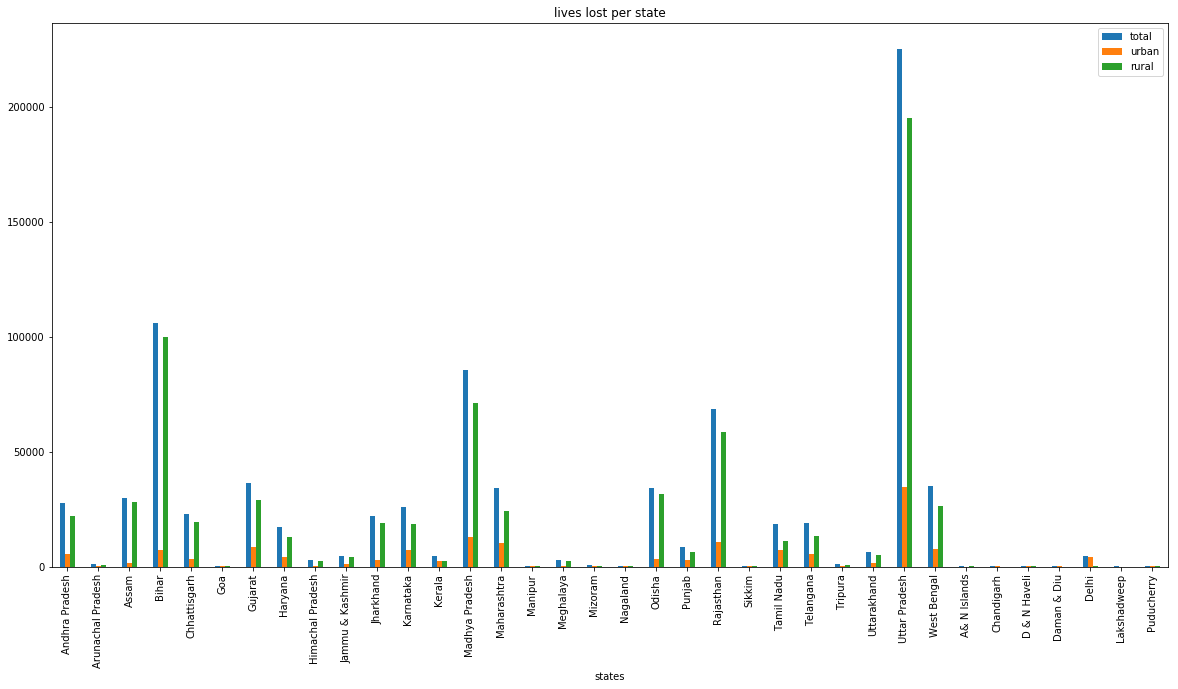

In [20]:
lives_lost.plot.bar(figsize=(20,10), title="lives lost per state")
plt.show()

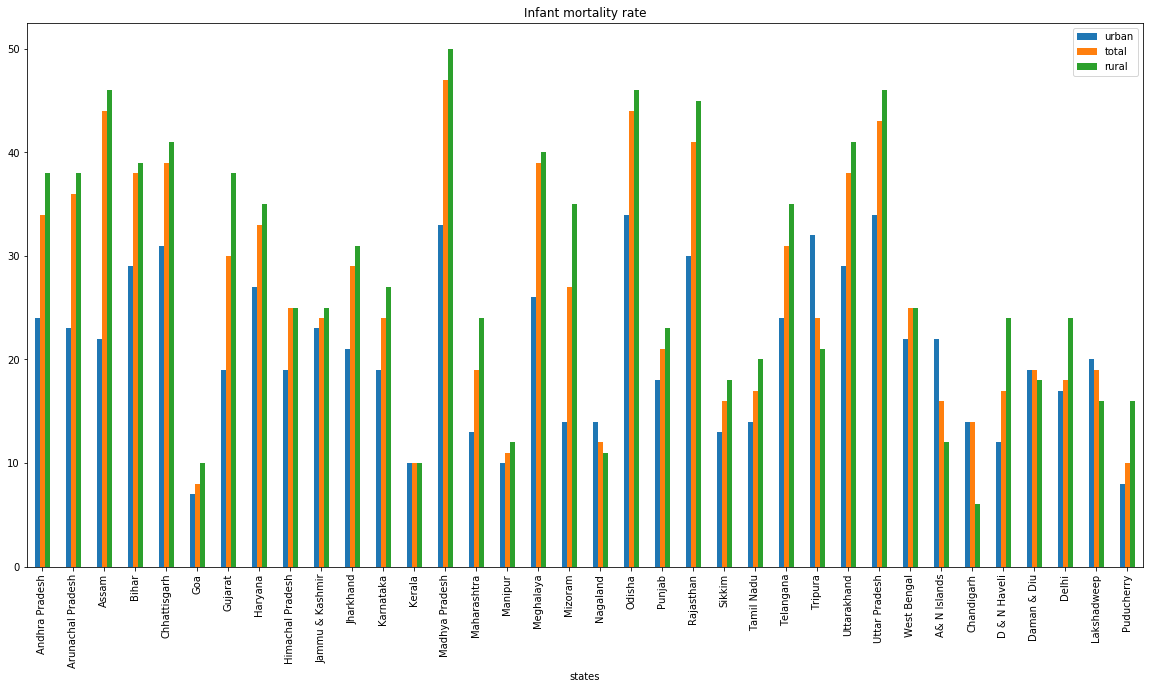

In [21]:
infant_mortality.plot.bar(figsize=(20,10), title="Infant mortality rate")
plt.show()

In [22]:
infant_mortality.idxmax()

urban            Odisha
total    Madhya Pradesh
rural    Madhya Pradesh
dtype: object

In [23]:
infant_mortality.idxmin()

urban           Goa
total           Goa
rural    Chandigarh
dtype: object

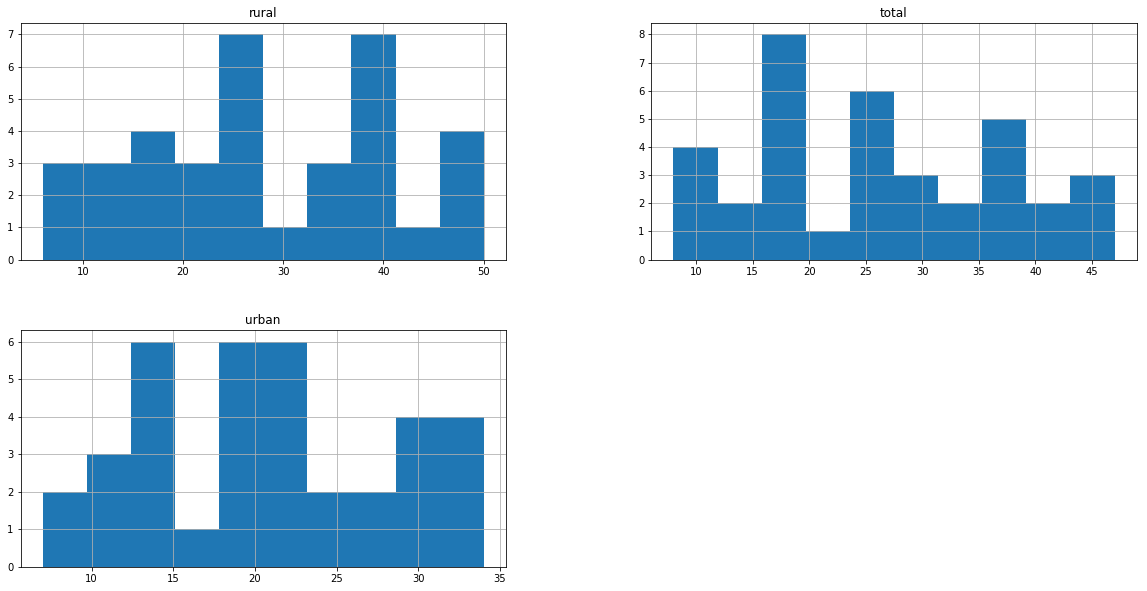

In [24]:
infant_mortality.hist(figsize=(20,10))
plt.show()

In [25]:
infant_mortality.mean()

urban    20.722222
total    26.166667
rural    28.083333
dtype: float64

In [26]:
infant_mortality.median()

urban    20.5
total    24.5
rural    25.0
dtype: float64

In [27]:
infant_mortality.loc["Madhya Pradesh"]

urban    33
total    47
rural    50
Name: Madhya Pradesh, dtype: int64

# Kepler.gl Visualization

download (right-click -> save as) [this](keplergl.json) and go to [here](https://uber.github.io/kepler.gl/#/demo). for an interactive visualization of infant mortality. you can see how to generate these [here](./Kepler.gl_data_creation.html)